In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# Absolute path of file
hawaii_path = "../Resources/hawaii.sqlite"

In [16]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{hawaii_path}")
Base = automap_base()

In [17]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [21]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
# Creation of variable to depict above
last_date_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_str = last_date_row[0] 
last_date = datetime.strptime(last_date_str, "%Y-%m-%d")

Last Date: 2017-08-23 00:00:00
One Year Ago: 2016-08-23 00:00:00


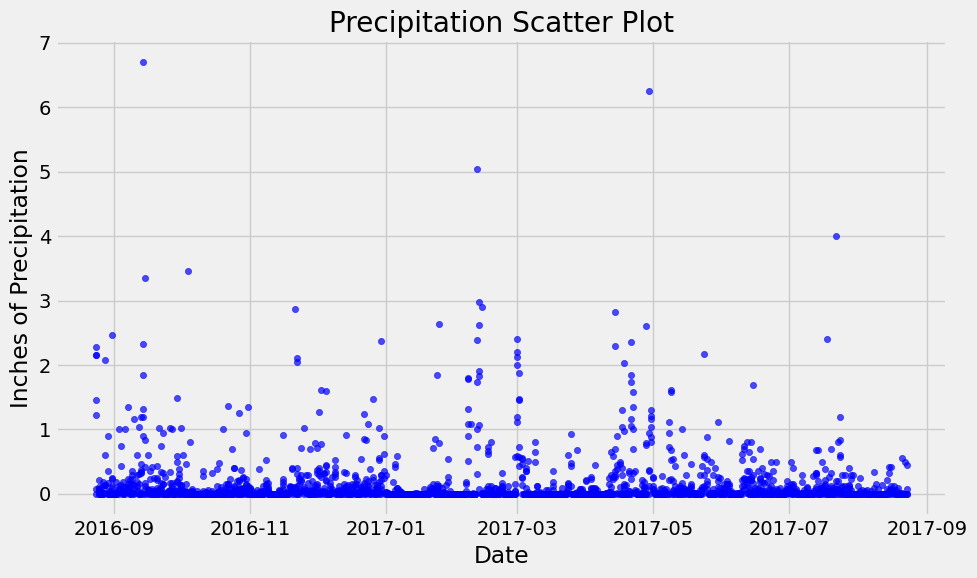

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
starting_point = last_date - timedelta(days=365)
print(f"Last Date: {last_date}")
print(f"One Year Ago: {starting_point}")
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > starting_point).all()
precipitation_scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_scores_df = pd.DataFrame(precipitation_scores)
precipitation_scores_df

# Sort the dataframe by date
precipitation_scores_df.sort_values(by='date')
precipitation_scores_df

# Use Pandas Plotting with Matplotlib to plot the data
# Convert 'date' column to datetime format
precipitation_scores_df["date"] = pd.to_datetime(precipitation_scores_df["date"])

# Replace NaN values in 'prcp' with 0 (or drop them if you prefer)
precipitation_scores_df["prcp"] = precipitation_scores_df["prcp"].fillna(0)

# Scatter plot using Pandas
ax = precipitation_scores_df.plot.scatter(
    x="date", 
    y="prcp", 
    figsize=(10, 6), 
    color="blue", 
    alpha=0.7,
    title="Precipitation Scatter Plot"
)

# Customize labels
ax.set_xlabel("Date")
ax.set_ylabel("Inches of Precipitation")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_scores_df["prcp"].describe()
summary_stats

count    2223.000000
mean        0.159951
std         0.441220
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [60]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Measurement.station)).scalar()
print(f"the total number of stations within the dataset is: {total_stations}")

the total number of stations within the dataset is: 19550


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

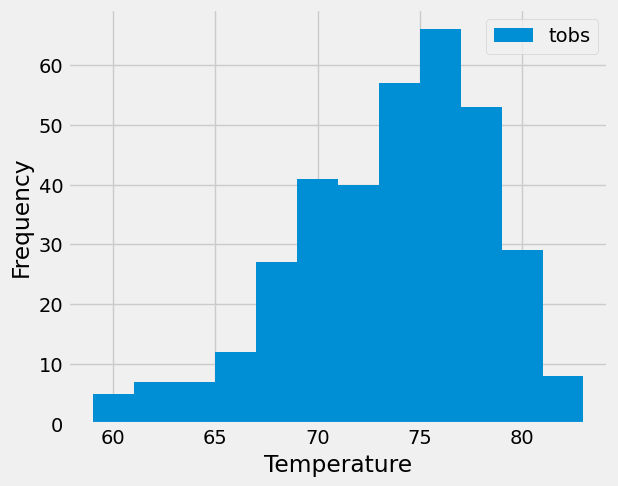

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()